In [1]:
from patchedimage import PatchedImage
from utilities import *

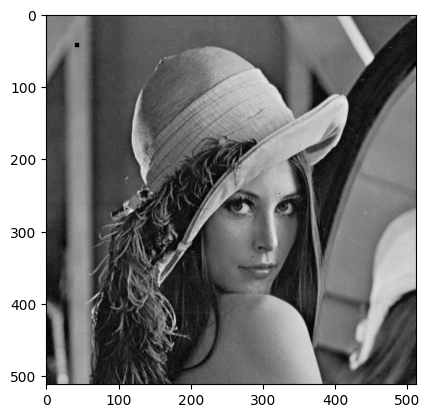

In [10]:
imgp = PatchedImage("images/lena.tif",4)
#imgp.set_masque(masque_circulaire((50,50),15,imgp.img.shape))
imgp.set_masque(masque_carre((40,40),(45,45),imgp.img.shape),leaf_size=128)#+masque_circulaire((20,50),15,imgp.img.shape))
imgp.set_priorities()
imgp.show_img()

In [11]:
for j in range(40,45):   
    for i in range(40,45):
        imgp.reconstruction((j,i))

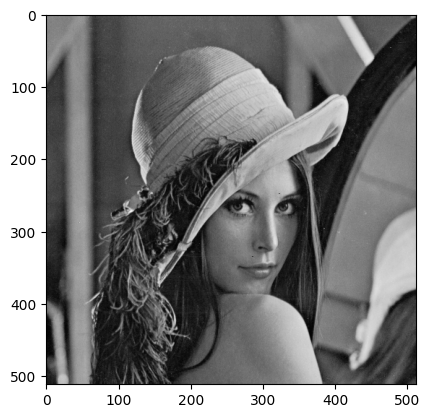

In [7]:
imgp.show_img()